[Back to Table of Contents](https://www.shannonmburns.com/Psyc158/intro.html)

[Previous: Chapter 20 - Sources of Model Bias](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-20.ipynb)

<div class="alert alert-block alert-info">
<b>**NOTE**</b>: At the moment there is an issue with Google Colab and the package rstanarm, where it takes ~1hr to install in the notebook. For now, read through this version of the notebook where the rstanarm code has been pre-executed. If you'd like to try it out yourself, you can download it to your own RStudio and enter the same commands. 
</div>

In [ ]:
# Run this first so it's ready by the time you need it
install.packages("readr")
install.packages("dplyr")
install.packages("ggformula")
library(readr)
library(dplyr)
library(ggformula)
fingers <- read_csv("https://raw.githubusercontent.com/smburns47/Psyc158/main/fingers.csv")

# Chapter 21 - Bayesian Statistics

## 21.1 Frequentist vs. Bayesian statistics

The ideas about inferential statistics in the previous chapters come from the perspective of Frequentist statistics. Almost every textbook for undergraduate psychology students starts with this framework, as the Frequentist view of statistics dominated the academic field of statistics for most of the 20th century and is a popular collection of tools among applied scientists. It was and is the most common practice among psychologists to use Frequentist methods. Because Frequentist methods are ubiquitous in scientific papers, every student of statistics needs to understand those methods.

However, Frequentist statistics can be frustrating to interpret. The major tenet of Frequentism is that there is only one state of the world. A hypothesis you are testing is either true, or it is not. We can describe the probability of generating certain datasets given the true state of the world, but if we don't know that state, we can't describe the probability of what that state is given a particular dataset we have collected. Unfortunately, that's usually the case we find ourselves in - we *don't* know the true state of the world, and our only hope to figure it out is by looking at some data. Frequentism thus isn't an ideal method for answering that question, and we have to do some brain bending things to make it work for us anyways:

- We can't figure out the probability of the true population parameter, so we have to think up some hypothetical parameters and see how likely those are to produce our data (p-values)
- We then have to reduce these probabilities to a binary yes/no decision about whether we want to accept this hypothetical parameter as being the truth (null hypothesis testing) 
- We can only ever reject a null hypothesis, but we can never build support for it 

If these topics have felt abstract and difficult to master, you wouldn't be alone. The convoluted nature of statistical inference with Frequentist methods partially explains errors that can be found in published research. 

This is why some people prefer a different approach to inferential statistics, called **Bayesian statistics**. These ideas as a collection are named after Thomas Bayes, the mathematician who contributed much to our understanding of probabilities. 

Bayesian statistics have a fundamentally different view of probability than Frequentist statistics do. In Frequentism, probability means the long-run proportion across many samples. If the true population parameter &beta; is 0, we can't measure it directly, but we can estimate it many times across many samples. This builds a sampling distribution, composed of many b estimates. 

<img src="images/ch16-beta0.png" width="450">

Because we sample these b estimates over and over and get different values each time, the b estimates can have probability. There is some proportion of these estimates, across many samples, that will equal a particular value. 

To a Frequentist, the population parameter &beta; *cannot* have a probability. It is inherently just one value, and it isn't generated by some underlying process. It just is. A population parameter is either equal to a particular value, or it is not. There's no way to get many values of it for measuring a proportion.

In contrast, in the Bayesian perspective, probability means something different. To a Bayesian, probability is your strength of belief about the population parameter. There is still one population parameter that we don't know, but until we know it there are many possible values is *could* be. 

<img src="images/ch21-beliefdist.png" width="650">

We can believe more strongly in some possible values than others - one value is more likely to be the truth than another value. In this sense, a population parameter can have a probability. Do we think a &beta; value of 0 is more likely to be the truth than a &beta; value of 10? What value do we believe in most strongly? 

Bayesian statistics is gaining ground among psychologists, so in this chapter we want to expose you to the basics of this approach, as well as contrast how you would use Bayesian statistics for the same use cases we have so far explored with Frequentist statistics. Bayesian statistics as a whole is a large field of study that is most appropriately learned in an entire course, rather than just one chapter in a course. But if these alternate approaches to statistical questions intrigue you more than the Frequentist methods you've already learned, pursuing more study in the area would be a great idea.

## 21.2 Conditional probability

Thomas Bayes' theorems of probability, and thus all of Bayesian statistics, are based on the idea of **conditional probability**. In chapter 8 we limited ourselves to simple probabilities - that is, the probability of a single elementary or complex event. This was the probability of such an event without any context, or other information that might help us narrow down the outputs. 

A conditional probability is the likelihood of some event, given another event has already happened. It is a bigger picture of likelihood than simple probability. 

Let’s take the 2020 US Presidential election as an example. There are two simple probabilities that we could use to describe the electorate. First, we know the probability that a voter in that election was affiliated with the Republican party: P(Republican) = 0.36. We also know the probability that a voter cast their vote in favor of Donald Trump: P(Trump) = 0.47. 

If we wanted to know the probability that a random voter coming out of a polling place voted for Trump, we might use that simple probability 47% to make a decision. It's not a very helpful probability - essentially flipping a coin. But in truth we rarely make decisions this way - obviously we'd find it more surprising that someone voted for Trump in West LA, California than if they were in Lander County, Nevada. 

Our instinct is to actually use conditional probabilities. We might expect that people who are Republican are more likely to have voted for Trump than people who are Democrat. Thus, if we already knew a random person was Republican, we might be able to use that information to better inform our decision about whether or not they voted for Trump. The question we now ask is, what is the probability that a person voted for Trump, *given* that they are a Republican?

We write the equation for a conditional probability as: 

$$P(A|B)$$

Which states the probability of A, given B. In our specific example, the probability of voting for Trump given someone is Republican is:

$$P(Trump vote|Republican)$$

The likelihood that any one person voted for Trump is 47%: P(Trump vote) = 0.47. But if we find out that 94% of Republicans voted for Trump, knowing whether or not somone is a Republican would change our guess confidence by a lot. Rather than 0.47, P(Trump vote|Republican) = 0.94. 

To calculate the conditional probability of A, we need to know the joint probability (that is, the probability of the complex event of both A and B occurring) as well as the overall probability of B. We want to know the probability that both things are true, given that the one being conditioned upon is true. The equation for this is:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can calculate conditional probability from data. Let's use an example we're familiar with, in the ```fingers``` dataset. We already know from lots of practice that student sex is related to their thumb length. Let's put this is terms of a conditional probability - what is the probability that someone's thumb is 60mm or longer, *given* that they are male? 

Below is a table of the joint probability of these data. On each row is each unique combination of data values (male or female, >=60mm or <60mm), as well as the number of people who fall into both those categories. 

| Sex     | Thumb length | number of participants |
| :-----: | :----------: | :--------------------: |
| Male    | >=60mm       | 34                     |
| Female  | >=60mm       | 46                     |
| Male    | <60mm        | 11                     |
| Female  | <60mm        | 66                     |

To compute P(>=60mm | male), we need to know the joint probability of being male and having a thumb at least as long as 60mm, in addition to the simple probability of being male.

To calculate the joint probability, we divide the number of people who are both male and have a long thumb by the total number of people. In our case, that is

$$\frac{34}{(34+46+11+66)} = 0.217$$

We could find this out with code as well:

In [ ]:
long_and_male <- filter(fingers, Thumb>=60 & Sex=="male")

prob_jointAB <- nrow(long_and_male) / nrow(fingers)
prob_jointAB

The simple probability of being male is the number of all people who are male, divided by the total number of people.

$$\frac{(34+11)}{(34+46+11+66)} = 0.287$$

In [ ]:
#Use code like above to figure out the probability of being male in our dataset:
prob_B <- #YOUR CODE HERE

Using the equation for conditional probability, the probability of having a long thumb given that someone is male is: 

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{0.2165605}{0.2866242} = 0.755$$


In [ ]:
prob_jointAB / prob_B

Notice that this conditional probability is different than the simple probability of being male (0.287) and of having a long thumb (0.510). If two variables are related to each other like sex and thumb length are, the conditional probability of a particular value on one variable given a value on the other is different than the simple probability of either variable alone. Knowing information about one variable helps us update our beliefs about the probability of the other variable. 

## 21.3 Reversing a conditional probability: Bayes' rule

Sometimes we know P(A|B), but we really want to know P(B|A). For example in medical screening, we know P(+test|disease), but we want to know P(disease|+test). 

Thomas Bayes [figured out a mathematical theorem](http://www.hep.upenn.edu/~johnda/Papers/Bayes.pdf) to help us do this. We now call this theorem **Bayes' rule**. To reverse a conditional probability:

$$P(B|A) = \frac{P(A|B)*P(B)}{P(A)}$$

Let's plug in our numbers from the table above to figure out P(male|>=60mm), rather than P(>=60mm|male).

$$P(male|>=60mm) = \frac{P(>=60mm|male)*P(male)}{P(>=60mm)} = \frac{0.755*0.287}{0.510} = 0.425$$

Does that seem surprising? The probability of having a long thumb given someone was male is pretty high, ~75.5%. But the reverse is not automatically true - if someone has a long thumb, the probability that they are also male is only 42.5%. This is because of the **base rate** of sex in our sample - only 28.7% of the participants are male. If we know someone has a long thumb, there is still an overall lower chance that someone is male. However, it's a *higher* chance than if we knew nothing about their thumb length. We changed our probability estimation based on the additional information about thumb length. 

Another way to think of Bayes’ rule is as a way to update our beliefs on the basis of data. That is, improving our understanding about the world using data. The different parts of Bayes’ rule have specific names, that relate to their role in using Bayes’ rule to update our beliefs. 

We start out with an initial guess about the probability of sex (P(B)), which we refer to as the **prior probability**. In the example above we'd use the base rate of sex as our prior, since it was our best guess as to the individual’s chance of being male before we knew their thumb length. 

We then collect some data about a new variable, thumb length. The degree to which thumb length (A) is related to sex (B) is given by P(A|B), which we refer to as the **likelihood**. This is how likely a long thumb is, given someone is male. 

The denominator of Bayes' rule (P(A)) is referred to as the **marginal likelihood**, because it expresses the overall likelihood of thumb length, averaged across all of the possible values of sex.  

The outcome to the left (P(B|A)) is referred to as the **posterior probability** - the probability of being male, given a long thumb. This name is because it’s what comes out the back end of the computation, once we've updated our prior probability with additional information.

A slightly different way of writing Bayes' rule makes this clearer: 

$$P(B|A) = \frac{P(A|B)}{P(A)}*P(B)$$

The fraction (P(A|B)/P(A)) tells us how much more or less likely having a long thumb is given being male, relative to the overall (marginal) likelihood of having a long thumb. If it is much more likely that someone will have a long thumb once we know they are male, this fraction value will be a large number. If it is much less likely that someone will have a long thumb once we know they are male, this fraction value will be less than 1. If knowing someone's sex doesn't change the likelihood of a long thumb at all, the fraction value will be equal to 1. 

The part on the right side (P(B)) tells us how likely we thought being male was before we knew anything about thumb length. 

This makes it clearer that the role of Bayes' rule is to update our prior knowledge about the probability of B, based on the degree to which A and B are related. 

## 21.4 Bayesian hypothesis testing

Let's return now to the idea of hypothesis testing. In Frequentist statistics, we learned that a p-value is just the probability of a set of data given the null hypothesis H<sub>0</sub> is true. We can write that now as a conditional probability:

$$P(b|\beta=0)$$

When hypothesis testing, we want to be able to make a decision about the null hypothesis being true, or not. In Frequentism the null hypothesis can't have a probability, so the closest we can get to that answer is to reason, if P(b|&beta;=0) is really small, &beta;=0 probably isn't the right description about the world. 

With Bayesian statistics, we can do a better job of answering this question. Now we can directly find the probability that &beta; equals 0. Specifically, using Bayes' rule, we can find the probability of the null hypothesis being true, given the data we have collected.

$$P(\beta=0|b) = \frac{P(b|\beta=0)}{P(b)}*P(\beta=0)$$

It's what we've been wanting to say all along, and now we're no longer held down by the convoluted nature of the Frequentist approach! When we have the ability to talk about the probability of a hypothesis we can do even more things, like:

- Figure out the probability that the true population parameter is at least as big as a smallest effect size of interest
- Adjust our belief of the probability of a population parameter based on prior information we already have 
- Provide evidentiary support for a specific value of the population parameter; this includes supporting the null hypothesis instead of just rejecting it 


## 21.5 Bayesian parameter estimation 

One powerful use case of Bayesian statistics is to figure out the most likely value of a population parameter. This process is called **Bayesian estimation**. 

Let's imagine an example where we want to test the effect of sex on thumb length. Sex is the only predictor, so the equation for this model would look like:

$$ Thumb_i = b_0 + b_1Sex_i + e_i$$

We can fit this model in R like we normally have in order to come up with a b<sub>1</sub> estimate from these data, as well as a likelihood that a true &beta;<sub>1</sub> = 0 would produce this estimate (the p-value). But Bayesian estimation goes a step further and uses that likelihood to update an existing belief about the true value of &beta;<sub>1</sub>. 

We will use an R package called ```rstanarm``` to do this process. Within this package is a function ```stan_glm()``` which will fit a model in the same way we did with ```lm()```, but also solve Bayes' rule for us in order to make statements about the probability of specific population parameters.  

In [86]:
#uncomment if you want to run rstanarm code yourself
#note right now it will take 40-60min to install (but the code is pre-executed for reading purposes)
#Sys.setenv(MAKEFLAGS= paste0("-j",parallel::detectCores()))
#install.packages("rstanarm")
#library(rstanarm)


The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpheagNO/downloaded_packages


Directly calculating the probability of a population parameter is a more satisfying decision than just rejecting or failing to reject a null hypothesis. But this kind of power comes with a downside. In Frequentist statistics, we calculated the probability of the data given a null hypothesis &beta;=0. This was only one probability calculation. In Bayesian statistics, remember that there are four parts to Bayes' rule, which in the context of estimates and parameters means:

- The prior P(&beta;): Our degree of belief about what the population parameter is before seeing any data
- The likelihood P(b|&beta;): How likely are the observed data given a particular population parameter
- The marginal likelihood P(b): How likely are the observed data, combining over all possible hypotheses
- The posterior P(&beta;|b): Our updated belief about the population parameter, given the data 

We have to calculate four things to make decisions about a population estimate, instead of one. For the prior in particular, this isn't even something we calculate so much as something we say we believe in to start with. It's just a number we pick. This is why one criticism of Bayesian statistics is that it is more subjective than Frequentist statistics. You shouldn't let that scare you away from using these tools, but it does mean you should be informed about how to make that decision.   

### Step 1 - Set the prior

Before we can estimate a population parameter, we need to establish what range of values it might have, and what probabilities we assign to each value before we know about any data. In other words, we have to pick a prior probability distribution. 

How do you make a belief about what the effect of ```Sex``` should be, before you've seen any data about it? Good question. There is a lot of debate over the best way to pick the prior. If you have no previous information about an effect and what you think the true effect might be, it's really hard to make guesses about its probability. In this case, researchers can start with what's called an **uninformative prior** or **flat prior**. This is a probability distribution that is constant across all possible values, since we have no information about what values are more likely than others. A uniform distribution would be an uninformative prior - that would be the guess that the true value of &beta;<sub>1</sub> has an equal probability of being any value.

Other times, researchers use a **weakly informative prior**. We use this distribution when we don't know what a likely value of &beta;<sub>1</sub> is, but we have some vague sense that certain values are more likely than others. I.e., if &beta;<sub>1</sub> in this model is the difference in group means between male and female thumb lengths (mm), something like &beta;<sub>1</sub>=4 is probably more likely than &beta;<sub>1</sub>=40. A normal distribution with a large standard deviation would be an example of this prior. Weakly informative priors are most common to use, and the defaults in most Bayesian software. 

On the other hand, if you're experienced with a research question, you may have done research like this before. You'd have an expert opinion on the likely value of &beta;<sub>1</sub>. You may not know it exactly, but you can guess pretty close. In this case, you have strong existing beliefs about what the probability distribution of &beta;<sub>1</sub> should be, and you'd choose to use an **informative prior** that is narrow.

<img src="images/ch21-informativepriors.png" width="900">

### Step 2 - Estimate model

To start with, we're going to go with the default prior in ```rstanarm``` (we'll investigate what that prior is in a little bit). Next, we fit the model with the ```stan_glm()``` function. This function lets us use the same formula syntax as ```lm()``` used and then output the results with ```summary()```.  

In [87]:
#stan_glm(Thumb ~ Sex, data=fingers)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.023412 seconds (Warm-up)
Chain 1:                0.028455 seconds (Sampling)
Chain 1:              

stan_glm
 family:       gaussian [identity]
 formula:      Thumb ~ Sex
 observations: 157
 predictors:   2
------
            Median MAD_SD
(Intercept) 58.3    0.8  
Sexmale      6.4    1.5  

Auxiliary parameter(s):
      Median MAD_SD
sigma 8.3    0.5   

------
* For help interpreting the printed output see ?print.stanreg
* For info on the priors used see ?prior_summary.stanreg

When running this code, you should see a big output with lines talking about chains. This is because R uses simulations of sampling distributions in order to estimate the posterior probability. We can ignore this information for our purposes. If you want to avoid getting this output in the future, add ```refresh=0``` as another argument in ```stan_glm()```. In addition, ```stan_glm()``` uses simulations to estimate the model, so you can get slightly different answers each time you run it unless you set a seed.

In [88]:
#set.seed(10)
#bayes_model <- stan_glm(Thumb ~ Sex, data=fingers, refresh=0)
#summary(bayes_model)


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      Thumb ~ Sex
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 157
 predictors:   2

Estimates:
              mean   sd   10%   50%   90%
(Intercept) 58.3    0.8 57.3  58.3  59.3 
Sexmale      6.4    1.4  4.6   6.5   8.3 
sigma        8.3    0.5  7.7   8.3   8.9 

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 60.1    0.9 58.9  60.1  61.3 

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
              mcse Rhat n_eff
(Intercept)   0.0  1.0  3563 
Sexmale       0.0  1.0  3612 
sigma         0.0  1.0  3295 
mean_PPD      0.0  1.0  3760 
log-posterior 0.0  1.0  1963 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is the potential scale reduc

After fitting the model, we can investigate what prior probability distribution this model used. We didn't specify anything in the model call, so it used the default of a weakly informative prior. To see what prior was used specifically, we can use the function ```prior_summary()``` on the model object.

In [89]:
#prior_summary(bayes_model)

Priors for model 'bayes_model' 
------
Intercept (after predictors centered)
  Specified prior:
    ~ normal(location = 60, scale = 2.5)
  Adjusted prior:
    ~ normal(location = 60, scale = 22)

Coefficients
  Specified prior:
    ~ normal(location = 0, scale = 2.5)
  Adjusted prior:
    ~ normal(location = 0, scale = 48)

Auxiliary (sigma)
  Specified prior:
    ~ exponential(rate = 1)
  Adjusted prior:
    ~ exponential(rate = 0.11)
------
See help('prior_summary.stanreg') for more details

Each section of the output tells you the shape of the prior that was used for each estimate in the model. The line "Specified prior" describes this shape in terms of standardized units, while the line "Adjusted prior" describes the shape in units of the variable. 

Look at the prior used for the predictor coefficients. There's only predictor, so just one prior is described here. The adjusted prior line tells us that the model call used a normal distribution for this prior, with a mean of 0 ("location" in this output) and an SD of 48 ("scale" in this output). 

Let's visualize this prior so that we understand it better. We'll draw 4,000 random numbers from a normal probability distribution with ```rnorm()```, using this mean and SD value. Then we'll plot the smoothed distribution of those samples using ```gf_density()```. 

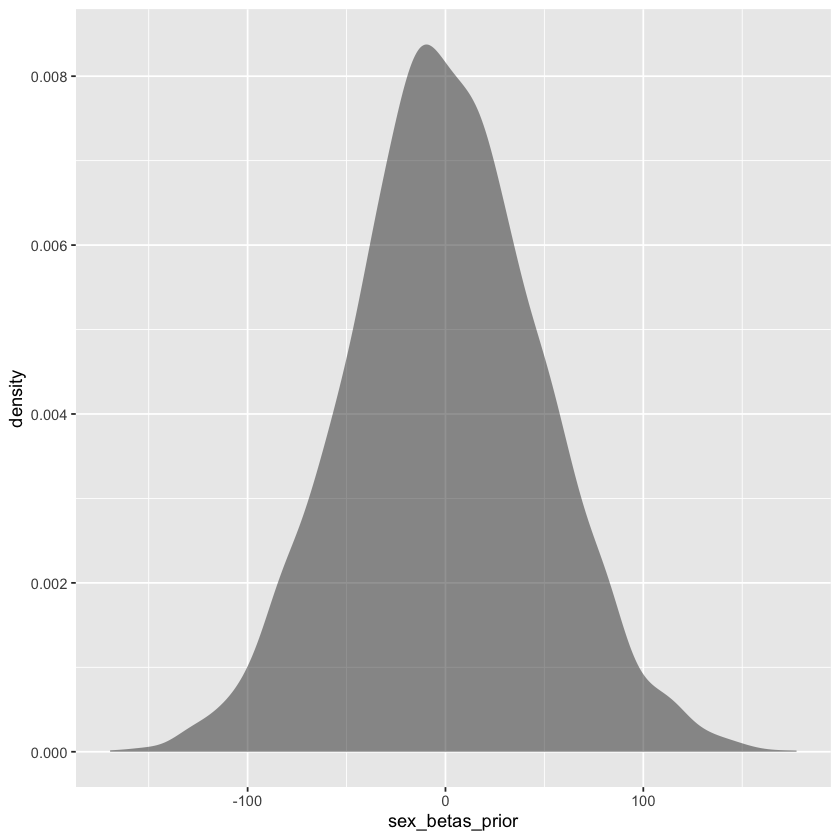

In [90]:
#sex_betas_prior <- rnorm(4000, 0, 48)
#probs_df <- data.frame(sex_betas_prior)
#gf_density(~sex_betas_prior, data=probs_df)

This prior distribution represents our guesses about what the true population parameter for &beta;<sub>1</sub> actually is. It's not an uninformative prior because it's not flat - we think &beta;<sub>1</sub>=0 is more likely to be the truth than &beta;<sub>1</sub>=100. But it's a weakly informative prior because there's a very large range of &beta;<sub>1</sub>s that we're considering. In our minds, before seeing any data, &beta;<sub>1</sub>=100 is still possible (if unlikely). In addition, because this prior is centered at 0 and covers potential &beta;<sub>1</sub> values that are both positive and negative, that means we don't know anything about the magnitude of the effect - we think a negative effect is just as likely as a positive effect.  

The intercept coefficient has a prior probability distribution too. According to the ```prior_summary()``` output, this prior is a normal distribution with mean 60 and SD 22. Even the estimate of the population standard deviation has a prior distribution to describe our beliefs about it (listed under "Auxilliary (sigma)"). The shape of that prior distribution is the exponential distribution (sampled with ```rexp()```) since that is the right shape for the sampling distribution of &sigma;. 

### Step 3 - Interpret posterior probability

The main values we care about in the model output are in the "Estimates" table. You can get this without the mess of the simulation information with the ```$stan_summary``` property of the model object:

In [91]:
#bayes_model$stan_summary

,mean,se_mean,sd,2.5%,10%,25%,50%,75%,90%,97.5%,n_eff,Rhat
(Intercept),58.276635,0.012879671,0.7687449,56.782095,57.311830,57.745845,58.271291,58.799327,59.266843,59.792521,3562.500,1.0000791
Sexmale,6.443833,0.023792864,1.4300291,3.569797,4.598453,5.489937,6.455513,7.414708,8.270203,9.217522,3612.404,0.9992579
sigma,8.283067,0.008466218,0.4859560,7.408737,7.670394,7.944087,8.256777,8.591663,8.925175,9.315826,3294.694,1.0000627
mean_PPD,60.135760,0.015053170,0.9230810,58.309899,58.949647,59.519628,60.141318,60.759740,61.312291,61.953128,3760.311,1.0002726
log-posterior,-560.477259,0.027209503,1.2056062,-563.657366,-562.095139,-561.023959,-560.182511,-559.573342,-559.271705,-559.078182,1963.223,1.0007891


We are interested in the effect of sex on thumb length, so we will focus on the row for that effect, ```Sexmale```. In the Bayesian model output, we don't actually get one single estimate for the population parameter. Under the hood it's fitting the same model in the same data as ```lm()``` does, but what it's giving us as a return value is the *posterior probability distribution*. This is the new distribution of our beliefs about the true population parameter, now that we have seen some data. That's why this output has columns for mean, sd, etc. 

We can visualize this new posterior probability distribution based on the model itself. The model object holds all the estimates of the population parameter from each simulation, so we can simply make a vector out of those estimates:  

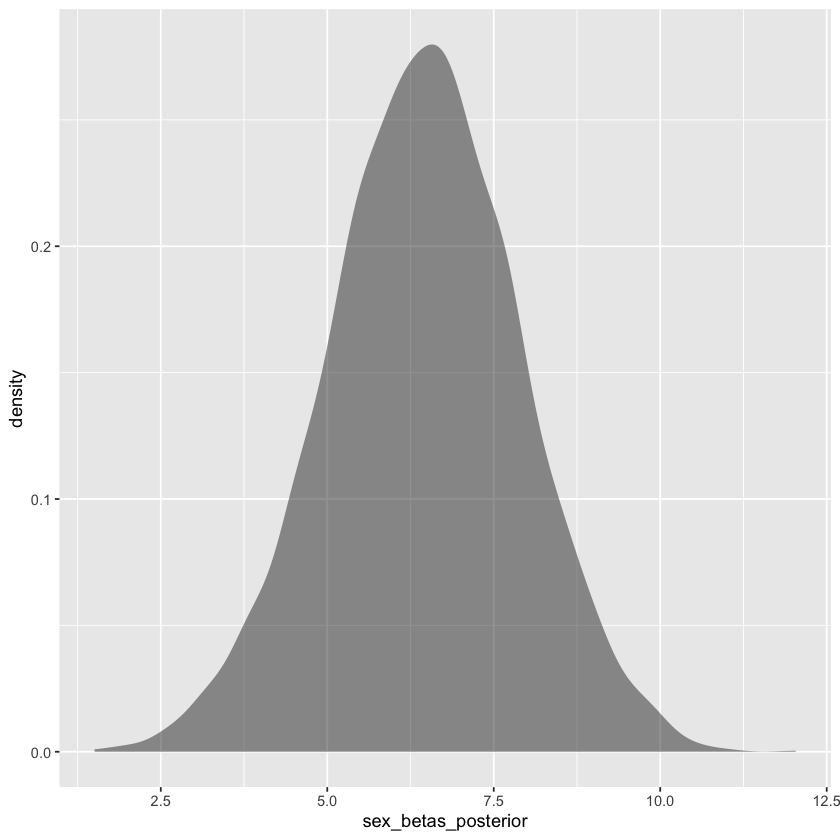

In [92]:
#probs_df$sex_betas_posterior <- as.matrix(bayes_model, pars = "Sexmale")
#gf_density(~sex_betas_posterior, data=probs_df)

Bayes models don't return just a point estimate, like Frequentist models do. We still have some variability in our beliefs about what the true population parameter is, so the model returns to us a distribution of this variability rather than a point estimate. We can visualize both the prior and the posterior probability distributions to see how the data changed out beliefs about the range of likely population parameters: 

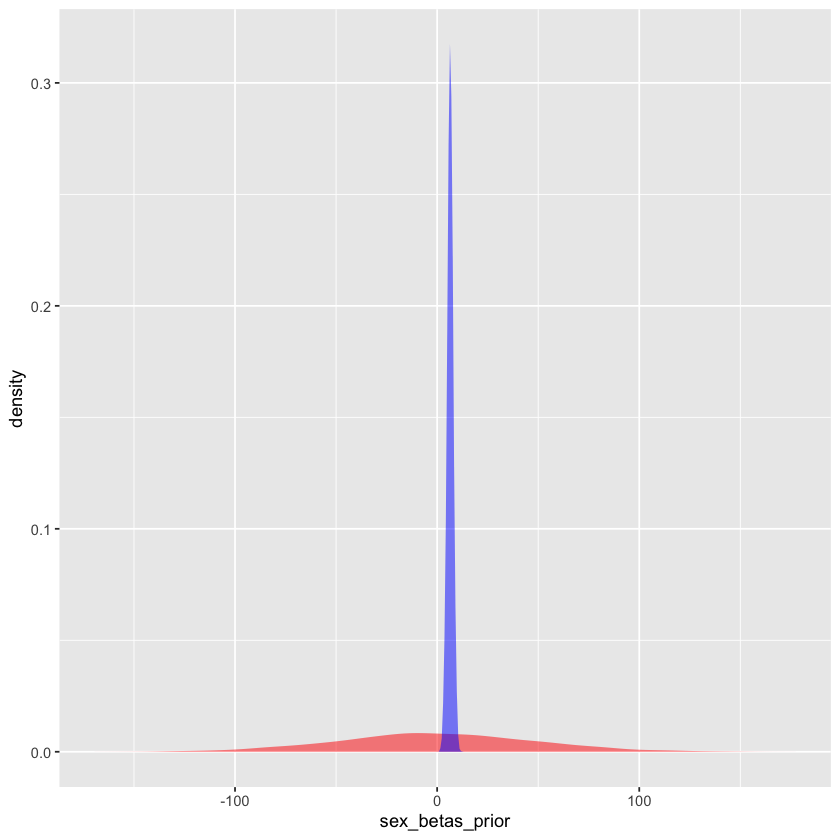

In [93]:
#gf_density(~sex_betas_prior, data=probs_df, fill="red", alpha=0.5) %>%
#    gf_density(~sex_betas_posterior, data=probs_df, fill="blue", alpha=0.5)

The shapes of these distributions are extremely different, which means the data changed our beliefs a lot! We are now much more certain about what the most likely population parameter value is - the posterior distribution is much narrower. In addition, the posterior is now centered on 6.444, instead of 0. The mean of a probability distribution is the most probable value in the distribution, so the fact that our posterior is centered on 6.444 means we shifted our idea of the most likely population parameter to be 6.444, instead of 0. 

Compare that value to the b<sub>1</sub> estimate that comes from a normal ```lm()``` call:

In [94]:
#summary(lm(Thumb ~ Sex, data=fingers))


Call:
lm(formula = Thumb ~ Sex, data = fingers)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.256  -4.281  -1.106   5.244  28.104 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  58.2558     0.7794  74.743  < 2e-16 ***
Sexmale       6.4468     1.4558   4.428 1.79e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.249 on 155 degrees of freedom
Multiple R-squared:  0.1123,	Adjusted R-squared:  0.1066 
F-statistic: 19.61 on 1 and 155 DF,  p-value: 1.785e-05


They're similar, but slightly different. In the ```lm()``` model output, the estimated b<sub>1</sub> is 6.447. This is the best fitting coefficient to minimize model error *in this sample*. In Frequentism we don't have prior beliefs about what the true population parameters are, so we would just take this number as our estimate of the &beta;<sub>1</sub>.

In Bayesian stats we do have prior beliefs, and those prior beliefs are not completely erased by the data. They're *updated*. The posterior mean is a bit closer to the mean of the prior than the Frequentist estimate is, because the prior still has sway over our posterior beliefs. 

In this case the prior doesn't influence our estimates by much. That's because we used weakly informative priors. If we had used flat priors, the posterior point estimates would perfectly match the Frequentist estimates (on average, across many simulation iterations). If we had used informative priors, those would have had a much larger influence on the posterior estimates. 

## 21.6 Posterior intervals

Remember in chapter 16 when we learned about confidence intervals. Those are a Frequentist tool that tells us the range of &beta; parameters that are 95% likely to create a specific b estimate. 

We went through an entire discussion about why you have to be careful when talking about the meaning of confidence intervals. You can't say that there is a 95% chance the population parameter is in this range, because that would be ascribing probability to a parameter that can't have a probability in Frequentism. Instead we have to do some linguistic tricks like saying we are 95% *confident* the true population parameter is in this range. 

In Bayesian models we can come up with a similar interval, but this time it actually does express the 95% probability of a parameter. These are called **credible intervals** or **posterior intervals**, and are calculated on the posterior probability distribution returned by a Bayesian model. 

Look again at the summary of the Bayesian model output: 

In [95]:
#bayes_model$stan_summary

,mean,se_mean,sd,2.5%,10%,25%,50%,75%,90%,97.5%,n_eff,Rhat
(Intercept),58.276635,0.012879671,0.7687449,56.782095,57.311830,57.745845,58.271291,58.799327,59.266843,59.792521,3562.500,1.0000791
Sexmale,6.443833,0.023792864,1.4300291,3.569797,4.598453,5.489937,6.455513,7.414708,8.270203,9.217522,3612.404,0.9992579
sigma,8.283067,0.008466218,0.4859560,7.408737,7.670394,7.944087,8.256777,8.591663,8.925175,9.315826,3294.694,1.0000627
mean_PPD,60.135760,0.015053170,0.9230810,58.309899,58.949647,59.519628,60.141318,60.759740,61.312291,61.953128,3760.311,1.0002726
log-posterior,-560.477259,0.027209503,1.2056062,-563.657366,-562.095139,-561.023959,-560.182511,-559.573342,-559.271705,-559.078182,1963.223,1.0007891


After the mean and sd values of the posterior probability distribution, this output lists several quantile values. A 95% posterior interval (abbreviated PI<sub>95</sub>) is the range of values that has a 95% chance of containing the true population parameter. In the context of the posterior distribution, this is the bounds between which 95% of the posterior is located. In this output, that would be the 2.5%ile to the 97.5%ile. For the effect of sex, that is PI<sub>95</sub> [3.57, 9.22]. 

We can also get this more directly with the ```posterior_interval()``` function:

In [96]:
#posterior_interval(bayes_model, pars="Sexmale", prob=0.95)

,2.5%,97.5%
Sexmale,3.569797,9.217522


The mean of the posterior distribution is our best guess about the population parameter, and the posterior interval communicates the precision of that guess. 

## 21.7 Smallest effect size of interest

We can also use the posterior probability distribution to determine how likely it is that the true population parameter is at least as large as some smallest effect size of interest. 

Based on how the data updated our prior beliefs, we now think the most likely value of the population parameter is 6.444. But there's still some uncertainty in our beliefs, as communicated by the posterior interval. 

Let's say we're working for a fashion company and trying to decide if our new glove design should be made with a male and female version. The fashion house only wants to spend the time on that if male and female thumb lengths differ by at least 5mm. Based on our posterior distribution, what is the probability that the true &beta;<sub>1</sub> >= 5? 

We can easily find the proportion of a normal posterior distribution with mean 6.444 and SD 1.430 that is above a value of 5: 

In [97]:
#bigger_than_5 <- probs_df$sex_betas_posterior >= 5
#sum(bigger_than_5) / length(probs_df$sex_betas_posterior)

[1] 0.84625

This tells us that, under our new beliefs about the population parameter, there is an 83.1% chance that the true difference between male and female thumb lengths is at least as large as 5mm. If I were advising a fashion company, I'd probably say they should make two versions of gloves!

## 21.8 Power planning in Bayesian stats

At the heart of Bayesian statistics is a motivation to estimate a population parameter as accurately as possible. That's different than the primary motivation of null hypothesis testing in Frequentism, which is to identify whether or not a population parameter is probably equal to 0. 

Power planning procedures that inform the sample size of a study in Frequentist statistics are aimed at telling us, based on an anticipated effect size and desired power level/Type I error rate, how many data points we need in order to find an effect as significant. In power planning, the precision of that estimate doesn't matter, just whether or not it is found to be significantly different than 0. 

Consider a power plan where we want to know what minimum sample size we need to find a correlation r effect size of 0.7. That's a big effect. If the true population parameter is really equal to 0.7, then we don't need much data to find it: 

In [98]:
#install.packages("pwr")
#library(pwr)

#pwr.r.test(n=NULL, r=0.7, sig.level=0.05, power=0.8)


The downloaded binary packages are in
	/var/folders/mg/1wy1xcls587_h0tqnj42l5740000gn/T//RtmpheagNO/downloaded_packages



     approximate correlation power calculation (arctangh transformation) 

              n = 12.81943
              r = 0.7
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


According to this power plan, we'd only need 13 data points to find that effect size as significant, if that were the true effect size.

You might have an intuition that that number is too small to be useful, despite what the power plan says. That depends on your definition of "useful." If all you care about is finding an effect significant, if you expect the effect to be large, you don't need much data at all to do that. 

But with n=13 and true &beta;=0.7, we would just barely decide it is significant (and only 80% of the time). The confidence interval of our estimate would be something like CI<sub>95</sub> [0.01, 1.39]. That doesn't overlap with 0, but if we care about the *specific value* of the true population parameter, that confidence interval isn't very helpful. Nearly all possible positive correlation values could reasonably produce an estimate of r=0.7 with only 13 data points.

In Bayesian statistics, power planning is not about what sample size you need to find a *significant* effect. Instead, it answers what sample size you need to find a *precise* effect. Bayesians do **precision planning**, instead of power planning. 

Currently there aren't easy-to-use tools in R for doing precision planning. Most people build their own simulations. Below is an example of some code that simulates a Bayesian sample size plan. Specifically, if we wanted to make a posterior estimate of the effect size that is at least as precise as 5mm (the posterior interval is no more than 5mm wide), we could draw increasingly larger random samples from the data until we can make a posterior interval that is narrow enough. Read through each line of the code and see if you understand what that step is doing. When you run the code, it may take a few moments to do all the simulations but will eventually output a minimum sample size needed to get a posterior interval with a precision of 5mm. 

In [99]:
#power planning for bayes model

#precision_target <- 5    #widest we want the PI to be
#PI_width <- Inf          #starting width of the PI
#sample_size <- 5         #minimum sample size to start with

#while (PI_width > precision_target) {                  #while the PI width is larger than precision_target...
#  sample_size <- sample_size + 1        #increase sample size on each loop
#  bootstrap_sample <- sample_n(fingers, size=sample_size, replace=TRUE) #draw a sample
#  num_sex <- length(unique(bootstrap_sample$Sex))   #are both sex values present in sample? If not, redraw
#  while (num_sex<2) {
#    bootstrap_sample <- sample_n(fingers, size=sample_size, replace=TRUE)
#    num_sex <- length(unique(bootstrap_sample$Sex))
#  }
#  bm <- stan_glm(Thumb ~ Sex, data=bootstrap_sample, refresh=0)   #fit bayesian model on subsample of data
#  PI <- posterior_interval(bm, pars="Sexmale", prob=0.95)         #find posterior interval of Sex effect 
#  PI_width <- PI[2]-PI[1]                    #update PI_width to be distance between lower and upper PI bounds
#}

#while loop will stop when PI precision is smaller than precision_target
#can then return sample_size
#sample_size

[1] 174

## 21.9 Updating priors

Most researchers use weakly informative priors for their Bayesian models. This is because we are usually studying novel hypotheses, and don't have strong beliefs about the true value of the population parameter. But if you have experience with a research question already (e.g., you've run a study before and are now doing a replication), you can change the priors used by ```stan_glm()``` to be informative priors. 

Let's walk through this process by estimating a new effect, the relationship between height and thumb length. We'll first split the ```fingers``` dataset in half to get a train and test set for replication. 

In [100]:
#fingers_train <- fingers[1:79,]
#fingers_test <- fingers[80:157,]

Now we will fit a Bayesian model to estimate the posterior belief of the effect of sex, but only in the training dataset.

In [101]:
#set.seed(10)
#train_model <- stan_glm(Thumb ~ Height, data=fingers_train, refresh=0)
#train_model$stan_summary

,mean,se_mean,sd,2.5%,10%,25%,50%,75%,90%,97.5%,n_eff,Rhat
(Intercept),7.8778877,0.297331400,18.0531477,-27.6828418,-14.7026987,-4.8055153,7.4850286,20.102060,31.108663,44.128154,3686.586,0.9994737
Height,0.7787846,0.004505499,0.2735220,0.2320031,0.4249465,0.5911932,0.7812811,0.971463,1.120664,1.318096,3685.519,0.9994834
sigma,7.6760737,0.010164091,0.6188773,6.5879370,6.9245533,7.2298121,7.6427870,8.068300,8.475023,8.987407,3707.423,0.9995159
mean_PPD,59.3282148,0.019374600,1.2032933,57.0019306,57.7965637,58.5029731,59.3193835,60.147198,60.846518,61.756865,3857.248,0.9997390
log-posterior,-278.5645050,0.026670502,1.2137391,-281.8614251,-280.1433537,-279.0964427,-278.2708477,-277.677897,-277.357872,-277.170779,2071.039,1.0023112


For ```train_model```, we didn't have strong prior beliefs about the true value of the height parameter. Because of this, we used the default prior included in ```stan_glm()```:

In [102]:
#prior_summary(train_model)

Priors for model 'train_model' 
------
Intercept (after predictors centered)
  Specified prior:
    ~ normal(location = 59, scale = 2.5)
  Adjusted prior:
    ~ normal(location = 59, scale = 20)

Coefficients
  Specified prior:
    ~ normal(location = 0, scale = 2.5)
  Adjusted prior:
    ~ normal(location = 0, scale = 6.1)

Auxiliary (sigma)
  Specified prior:
    ~ exponential(rate = 1)
  Adjusted prior:
    ~ exponential(rate = 0.13)
------
See help('prior_summary.stanreg') for more details

This weakly informative prior had a mean of 0 and an SD of 6.1. 

Now, after fitting the model, we are more confident in what the true population parameter is. The mean of our posterior is 0.779, and the SD is 0.274. This is now the state of our belief about the population parameter. There are no p-values here, but the posterior interval tells us how precise our beliefs are about the parameter estimate: 

In [103]:
#posterior_interval(train_model, pars="Height", prob=0.95)

,2.5%,97.5%
Height,0.2320031,1.318096


This tells us that we believe the true population parameter has a 95% chance of being between 0.232 and 1.318. Each 1 inch increase in height corresponds to a predicted 0.232mm change in thumb length, up to a predicted 1.318mm change in thumb length. We no longer think the possible options for this parameter are as wide (prior SD was 6.1), and we no longer think a population parameter of 0 is a likely option. 

Now, we want to do a replication with the test data. Because we've fit this model before, we don't have to go back to using an uninformative prior. Our beliefs were updated based on seeing the data in the train set, so we shouldn't forget about that. When fitting the model in the train data, we should use the posterior of ```train_model``` and pass it in as the prior of ```test_model```.

To do this, we need some more arguments in the ```stan_glm()``` function call. Look at the new argument ```prior=``` in the code below.

In [104]:
#set.seed(10)
#test_model <- stan_glm(Thumb ~ Height, data = fingers_test, refresh=0, 
#                       prior = normal(0.7787846, 0.2735220, autoscale=FALSE))

Rather than using a default prior of mean=0 and SD=6.1, this new prior is the posterior from the previous analysis, with the mean and SD from ```train_model```'s summary. We also set ```autoscale=FALSE``` so that it doesn't try to standardize these values. 

We were somewhat certain about the true population parameter going into this analysis, but not strongly certain: the posterior interval had a range of ~1.09. Now, when we update our beliefs even further with additional data, we get: 

In [105]:
#test_model$stan_summary
#posterior_interval(test_model, pars="Height", prob=0.95)

,mean,se_mean,sd,2.5%,10%,25%,50%,75%,90%,97.5%,n_eff,Rhat
(Intercept),-1.9086566,0.201984998,12.4061098,-26.896851,-17.6534184,-10.050390,-1.9976874,6.306390,14.064395,22.653486,3772.533,0.9994552
Height,0.9544212,0.003053495,0.1876025,0.585029,0.7159396,0.830606,0.9556246,1.076878,1.192674,1.336991,3774.703,0.9994234
sigma,8.5562759,0.011524464,0.6944112,7.345231,7.6955498,8.068811,8.5082341,8.998116,9.472051,10.051075,3630.714,1.0006378
mean_PPD,60.8956847,0.021720984,1.3442115,58.252216,59.1929788,59.948060,60.9005909,61.833616,62.606171,63.432703,3829.801,1.0004535
log-posterior,-284.1739371,0.030483917,1.2262261,-287.346699,-285.8222326,-284.762009,-283.8722743,-283.271839,-282.933727,-282.764560,1618.078,0.9997015


,2.5%,97.5%
Height,0.585029,1.336991


Now, our posterior distribution is even narrower. It is only ~0.752 wide. We can compare visualizations of the prior and posterior distributions again to see how our beliefs changed based on the second set of data: 

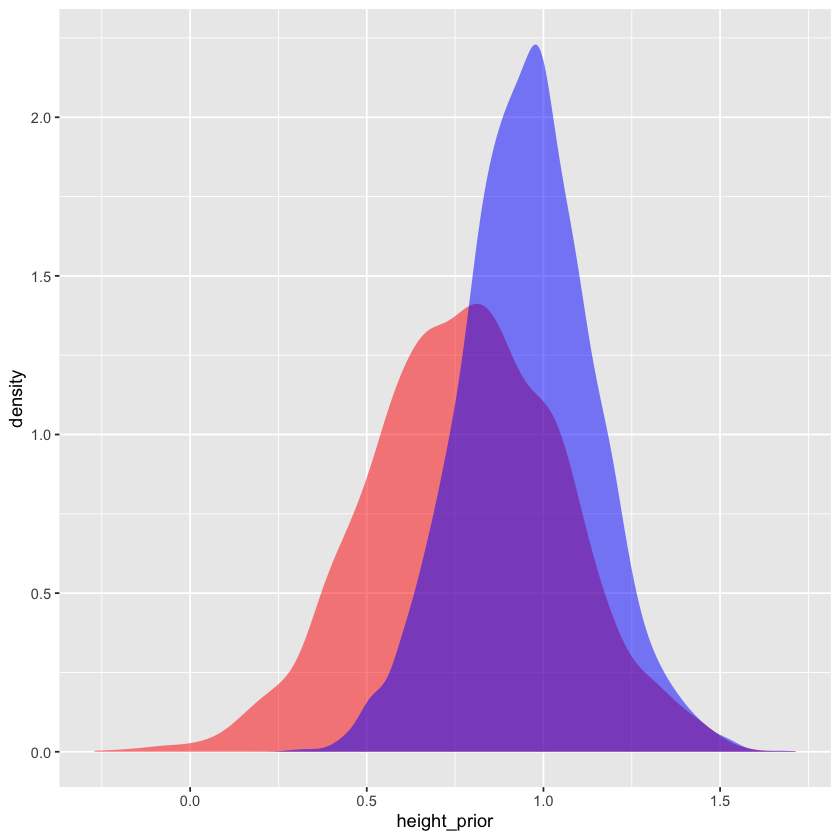

In [106]:
#probs_df$height_prior <- as.matrix(train_model, pars = "Height")
#probs_df$height_posterior <- as.matrix(test_model, pars = "Height")
#gf_density(~height_prior, data=probs_df, fill="red", alpha=0.5) %>%
#    gf_density(~height_posterior, data=probs_df, fill="blue", alpha=0.5)

The red distribution is our prior, and the blue distribution is our posterior. We see that considering data from the second dataset shifted our beliefs up a bit, and made our beliefs more precise. 

If we had instead ignored the beliefs we collected in the train data and used a weakly informative prior again for ```test_model```, our posterior would be centered on a different value and be less precise. 

In [107]:
#fit a Bayesian model with stan_glm() and data=fingers_test, but using the default prior
#set.seed(10)
#test_model2 <- stan_glm(Thumb ~ Height, data=fingers_test, refresh=0) 
#test_model2$stan_summary
#posterior_interval(test_model2, pars="Height", prob=0.95)

,mean,se_mean,sd,2.5%,10%,25%,50%,75%,90%,97.5%,n_eff,Rhat
(Intercept),-12.307686,0.279193408,16.7280286,-44.905462,-33.4271951,-23.4495059,-12.387899,-1.351409,8.958024,20.344961,3589.874,1.0002574
Height,1.112792,0.004229328,0.2538605,0.615760,0.7886862,0.9462744,1.115422,1.285241,1.434090,1.604901,3602.862,1.0003165
sigma,8.548490,0.011852731,0.7072630,7.289631,7.6895188,8.0568139,8.502755,8.997519,9.454188,10.075990,3560.615,0.9998898
mean_PPD,60.955728,0.022317587,1.3408151,58.375578,59.2513121,60.0500037,60.926074,61.830021,62.676579,63.567947,3609.469,1.0009680
log-posterior,-283.788286,0.029877805,1.2733773,-287.029851,-285.4004522,-284.3291013,-283.463167,-282.877874,-282.551359,-282.384199,1816.422,1.0032082


,2.5%,97.5%
Height,0.61576,1.604901


This is actually another version of Bayesian power planning, called **optional stopping**. Rather than knowing ahead of time how many datapoints to collect, you can collect in batches of smaller numbers (e.g., 20). After each batch, you fit a Bayesian model, refining the beliefs of the prior model. You keep adding new batches until the posterior distribution is narrow enough for your liking. At that point, you choose to stop collecting new data.

If you wanted to control the priors for a multivariable model, you would likely want to make different priors for each predictor in the model. For instance, if we regress Thumb length on the effect of Height AND Sex: 

In [108]:
#set.seed(10)
#multi_train_model <- stan_glm(Thumb ~ Height + Sex, data = fingers_train, refresh=0)
#multi_train_model$stan_summary

,mean,se_mean,sd,2.5%,10%,25%,50%,75%,90%,97.5%,n_eff,Rhat
(Intercept),12.1610324,0.476942720,24.1339730,-35.53425821,-18.6532342,-3.7932677,12.2856983,28.3643732,42.911324,59.714771,2560.502,1.0011904
Height,0.7105006,0.007421526,0.3729238,-0.02356005,0.2325843,0.4606013,0.7077751,0.9595246,1.184119,1.449795,2524.956,1.0012810
Sexmale,0.7048560,0.052727460,2.6040970,-4.39806775,-2.5810635,-1.0375642,0.6592855,2.4840200,4.041773,5.857015,2439.162,1.0012642
sigma,7.7223836,0.012404984,0.6341368,6.61523077,6.9451031,7.2768866,7.6874744,8.1184809,8.537103,9.116240,2613.205,1.0009864
mean_PPD,59.3086130,0.021164984,1.2271953,56.84362082,57.7415777,58.5131819,59.3142277,60.1275321,60.873625,61.650245,3361.952,0.9999716
log-posterior,-280.0048357,0.037690666,1.4885211,-283.91900347,-281.9710757,-280.7135295,-279.6584266,-278.9280644,-278.487828,-278.189945,1559.705,1.0027638


We find that in the train data, the mean and SD of the posterior for Height are 0.711/0.373 respectively, while the mean and SD of the posterior for Sex is 0.705/2.604. To pass these different numbers to the ```prior=``` argument of ```stan_glm()```, we use vectors containing all the numbers instead of one number at a time.

In [109]:
#set.seed(10)
#multi_test_model <- stan_glm(Thumb ~ Height + Sex, data = fingers_test, refresh=0, 
#                       prior = normal(c(0.711,0.705), c(0.373,2.604), autoscale=FALSE)) 
#multi_test_model$stan_summary

,mean,se_mean,sd,2.5%,10%,25%,50%,75%,90%,97.5%,n_eff,Rhat
(Intercept),4.9917902,0.241224602,14.5966684,-23.5349453,-13.8061997,-4.5477325,5.0648344,14.9238393,22.912117,33.605835,3661.544,1.0002934
Height,0.8362679,0.003723849,0.2239008,0.3956248,0.5585055,0.6830834,0.8366127,0.9837587,1.124017,1.274382,3615.156,1.0002612
Sexmale,3.1408343,0.028982465,1.7944355,-0.3490377,0.8730790,1.9397885,3.1211039,4.3457404,5.447382,6.666120,3833.408,1.0000942
sigma,8.3819504,0.011139545,0.6814396,7.1910507,7.5517826,7.9030719,8.3471688,8.7954100,9.253999,9.822847,3742.138,0.9994899
mean_PPD,60.8872533,0.022631621,1.3304074,58.2749726,59.1469400,60.0283220,60.9049201,61.7884897,62.597216,63.450034,3455.715,1.0000238
log-posterior,-284.0347906,0.035722019,1.4796697,-287.6952448,-285.9946231,-284.7446480,-283.6679107,-282.9722284,-282.555816,-282.261078,1715.764,1.0010260


## 21.10 Bayes factors

The above use cases describe how to apply Bayesian philosophy to evaluation of individual parameters in a model. We can estimate the likely value of each population parameter in a model, say how precise that estimate is, make sample size decisions for attaining precision, and update beliefs about population parameters based on new data. 

There is also a Bayesian method to compare entire models to each other. The method for that involves what are called **Bayes factors**. 

Bayesian estimation tells you the probability that the population parameter equals a particular value, given some data. A Bayes factor is a ratio of the probability that the parameter equals some number I, compared to the probability that the parameters equals some other number J, given the same data: 

$$Bayes factor = \frac{P(\beta=I|b)}{P(\beta=J|b)}$$

If I has a much higher probability (the Bayes factor ratio is large), then we would say the evidence strongly favors the parameter equalling I instead of J. A Bayes factor is the value of this ratio. 

We can extend this logic up to many sets of parameters for comparing models. What is the probability that all the parameters in a model are equal to a set of values, compared to the probability they equal a different set of values?

Frequently, this question is asked about a null hypothesis where all &beta;=0 vs. some alternative hypothesis where at least some &beta;=/=0. It uses Bayesian methods to answer the Frequentist concern about the null hypothesis. The plus side to doing this instead of Frequentist model comparison is that it lets you build support for the null hypothesis itself, and allows you to use optional stopping once you've accumulated enough evidence for either hypothesis.

The package ```BayesFactor``` is an easy way of doing this. All you have to do is fit a model the normal way with the function ```BFlm()```, and it will tell you the Bayes factor in favor of that model having non-zero parameters compared to the null model where all &beta; = 0. 

In [ ]:
#big package, may take a moment to install and load - but this one should work for you!
install.packages("BayesFactor")
library(BayesFactor)

lmBF(Thumb ~ Sex, data=fingers)

The output of this function is a table telling you which model is being compared to the null, and what the Bayes factor is in favor of that model. In this case, we are considering a model with just Sex as a predictor, and the corresponding Bayes factor is 1003.178.

Is that good or bad evidence in favor of the sex model? This number means that the probability at least one parameter in the model is non-zero is about 1000x higher than the probability all parameters are zero. Seems like pretty good evidence in favor of the sex model! 

In case you get smaller numbers, the stats community has arrived at some rules of thumb for what counts as strong vs. weak evidence in favor of a model. Those can be seen in the table below.

| Bayes Factor | Evidence in favor of model                  |
| :----------: | :-----------------------------------------: |
| <0.007       | Very strong evidence in favor of null       |
| 0.01-0.05    | Strong evidence in favor of null            |
| 0.05-0.3     | Weak evidence in favor of null              |
| 0.3-3        | Inconclusive evidence either way            |
| 3-20         | Weak evidence in favor of full model        |
| 20-150       | Strong evidence in favor of full model      |
| >150         | Very strong evidence in favor of full model |

To compare full models to simpler ones, consider the fact that: 

$$\frac{\frac{A}{C}}{\frac{B}{C}} = \frac{A}{B}$$

So if the Bayes factor of a model represents the ratio of model/null evidence, dividing the Bayes factor for one model by the Bayes factor for another model will tell you the amount of evidence in favor of a particular model. 

In [ ]:
bf1 <- lmBF(Thumb ~ Height*Weight, data=fingers) #model option with an interaction
bf2 <- lmBF(Thumb ~ Height + Weight, data=fingers)   #model option with no interaction

bf1/bf2

The Bayes factor of 0.52 in this model comparison suggests there is inconclusive evidence for which model is more likely than the other, given the data. Based on this, we'd probably just go with a simpler model with no interaction. 

## Chapter summary

After reading this chapter, you should be able to: 
- Explain the difference between Frequentist and Bayesian definitions of probability
- Understand a conditional probability
- Use Bayes' rule to reverse a conditional probability
- Define a prior vs. posterior probability
- Use stan_glm() in the rstanarm package to estimate posterior probabilities of model parameters
- Find the posterior interval of a model parameter
- Calculate the probability that a parameter is at least as large as a smallest effect size of interest
- Understand power planning for precision
- Update priors in stan_glm()
- Explain and use Bayes factors for model comparison

[Next: Chapter 22 - Lying with Statistics](https://colab.research.google.com/github/smburns47/Psyc158/blob/main/chapter-22.ipynb)